In [1]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# モデルの背後にある決定論的非線形関数を定義
f = lambda x: np.exp(3 * x)

In [3]:
# トレーニングデータの生成
x_tr = np.linspace(0., 2, 200)
y_tr = f(x_tr)

In [4]:
# 答えデータの生成
x = np.array([0, .1, .2, .5, .8, .9, 1])
y = f(x) + np.random.randn(len(x)) 

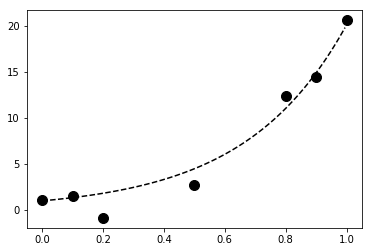

In [7]:
plt.plot(x_tr[:100], y_tr[:100], '--k')
plt.plot(x, y, 'ok', ms=10)

In [12]:
# 線形モデルの学習
lr = lm.LinearRegression() # モデルを作成
lr.fit(x[:, np.newaxis], y) # 訓練データを使って学習
y_lr = lr.predict(x_tr[:, np.newaxis]) # 学習結果を使っての予測
print(x_tr[:3])
print(y_tr[:3])
print(y_lr[:3])

[ 0.          0.01005025  0.0201005 ]
[ 1.          1.03060989  1.06215675]
[-2.04413082 -1.85422089 -1.66431097]


Text(0.5,1,'Linear regression')

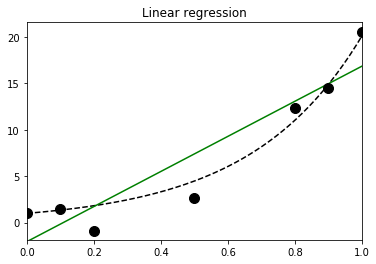

In [14]:
plt.plot(x_tr, y_tr, '--k')
plt.plot(x_tr, y_lr, 'g')
plt.plot(x, y, 'ok', ms=10)
plt.xlim(0, 1)
plt.ylim(y.min()-1, y.max()+1)
plt.title("Linear regression")
# 線形モデル(Linear model)では適合しなかったことがかくにんできる(exp(3 * x)に回帰)

32.34 -13.44 0.00
747.16 -1875.39 1613.41 -506.62 40.95 0.00


Text(0.5,1,'Linear regression')

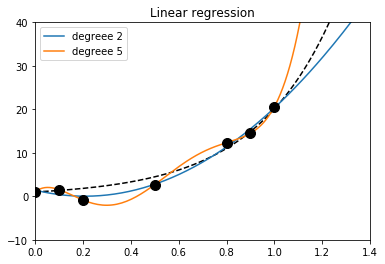

In [18]:
# 非線形モデルの多項式による学習
lrp = lm.LinearRegression()
plt.plot(x_tr, y_tr, '--k')
for deg in [2, 5]:
    lrp.fit(np.vander(x, deg + 1), y) # 2, 5次多項で学習
    y_lrp = lrp.predict(np.vander(x_tr, deg + 1)) # 学習結果を使って予測
    plt.plot(x_tr, y_lrp, label = 'degreee ' + str(deg))
    plt.legend(loc=2)
    plt.xlim(0, 1.4)
    plt.ylim(-10, 40)
    # モデルの係数を表示
    print(' '.join(['%.2f' % c for c in lrp.coef_]))
plt.plot(x, y, 'ok', ms=10)
plt.title('Linear regression')

13.81 4.63 0.00
3.71 4.38 4.93 4.82 2.24 0.00


Text(0.5,1,'Ridge regression')

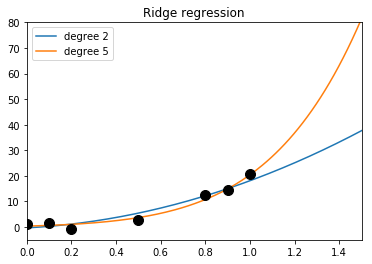

In [20]:
# リッジ回帰
# リッジ回帰では多項式の係数が大きくなりすぎることを防ぐ機能がある。
ridge = lm.RidgeCV()

for deg in [2, 5]:
    ridge.fit(np.vander(x, deg + 1), y)
    y_ridge = ridge.predict(np.vander(x_tr, deg + 1))
    plt.plot(x_tr, y_ridge, label='degree ' + str(deg))
    plt.legend(loc=2)
    plt.xlim(0, 1.5)
    plt.ylim(-5, 80)
    print(' '.join(['%.2f' % c for c in ridge.coef_]))
plt.plot(x, y, 'ok', ms=10)
plt.title("Ridge regression")